In [150]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import figure
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.datasets import load_digits
from sklearn import metrics

In [151]:
%matplotlib inline

In [152]:
df= pd.read_csv("cleanedtraining.csv")
#poor = 1, standard = 2, good = 0

In [153]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [154]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,30,10,34081.38,2611.115000,8,7,15,3,1346,30,...,3,1704.18,35.171160,6,2,70.478333,38.436983,0,392.196185,1
1,30,15,34081.38,2611.115000,8,7,15,3,1346,34,...,3,1704.18,29.762159,6,2,70.478333,220.552192,5,260.080975,1
2,23,3,114838.41,9843.867500,2,5,7,3,1919,11,...,1,1377.74,29.819187,14,1,226.892792,649.809364,2,367.684594,2
3,24,3,114838.41,9843.867500,2,5,7,3,1919,13,...,3,1377.74,26.114214,14,0,226.892792,546.380571,6,491.113388,0
4,24,3,114838.41,9843.867500,2,5,7,3,1919,11,...,1,1377.74,27.813354,14,1,226.892792,254.571767,0,742.922191,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,21,1,38321.39,3354.449167,4,4,3,4,2183,11,...,1,678.57,27.013535,9,1,114.271146,89.768522,1,381.405249,1
13065,21,1,38321.39,3106.647859,4,4,3,4,2183,6,...,3,678.57,28.951691,9,1,362.072453,259.135635,4,242.038135,2
13066,25,9,39628.99,3359.415833,4,6,7,2,262,20,...,3,502.38,39.323569,25,1,35.104023,140.581403,1,410.256158,1
13067,25,9,39628.99,3359.415833,4,6,7,2,262,23,...,3,502.38,34.663572,25,1,35.104023,60.971333,0,479.866228,1


In [155]:
df['Credit_Score'].value_counts()

2    8221
1    3548
0    1300
Name: Credit_Score, dtype: int64

In [156]:
df_strd= df[df['Credit_Score']== 2]
df_poor= df[df['Credit_Score']== 1]
df_good= df[df['Credit_Score']== 0]

In [157]:
df_strd_downsampled = resample(df_strd, replace=False, n_samples=df_good.shape[0])
df_poor_downsampled = resample(df_poor, replace=False, n_samples=df_good.shape[0])
df_balanced = pd.concat([df_good, df_strd_downsampled, df_poor_downsampled])

In [158]:
df_strd_downsampled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
12649,33,14,30620.69,2322.724167,3,7,10,3,503,11,...,1,1395.64,32.980469,9,1,67.053819,78.748345,1,336.470253,2
8282,39,9,118151.16,9904.930000,4,5,8,4,2071,7,...,2,643.56,25.768073,8,1,205.968097,266.855508,1,767.669396,2
9639,49,8,21129.93,1840.827500,3,4,3,4,636,14,...,2,611.40,27.378458,7,0,39.594951,248.449385,5,186.038414,2
7226,21,0,57326.49,5042.207500,3,5,13,2,1846,17,...,2,1040.21,33.324473,16,0,55.245005,411.821693,5,327.154051,2
5687,20,14,14384.40,1218.700000,3,7,19,6,342,15,...,2,1465.30,33.326726,30,2,65.497084,117.426995,5,228.945922,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,20,8,99194.19,8530.182500,3,6,7,2,799,24,...,2,573.52,40.071234,33,2,109.210708,167.674532,1,826.133009,2
10151,33,9,19741.36,1543.113333,4,5,15,6,563,14,...,2,1250.19,26.575289,3,0,87.431578,49.842604,2,277.037152,2
2365,36,14,27476.99,2301.749167,7,4,20,4,1448,15,...,2,566.21,30.200462,34,2,73.478538,145.410948,3,281.285430,2
11772,37,5,81367.12,6943.593333,5,5,7,2,1574,12,...,2,1039.70,26.941832,17,1,100.275316,54.227941,0,779.856076,2


In [159]:
df_poor_downsampled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
718,22,11,15081.120,1298.760000,8,7,22,4,198,31,...,2,1987.21,25.553941,8,2,41.065894,46.369487,5,332.440620,1
7576,43,14,17633.710,1489.475833,5,4,9,7,1759,24,...,2,1488.80,31.525079,30,2,62.055296,146.884893,5,230.007394,1
2443,42,2,14378.240,1311.186667,7,8,30,6,2136,24,...,2,1823.61,37.927539,2,2,57.853501,134.833714,5,228.431452,1
5664,43,0,80754.160,6692.513333,5,9,20,7,2325,11,...,2,2587.15,27.945150,7,2,392.170203,240.957166,5,326.123964,1
3954,34,15,32045.780,2677.481667,6,9,30,7,1339,5,...,3,1333.18,35.006450,30,2,169.770374,33.956965,0,304.020828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,32,1,16276.325,1210.360417,5,5,11,1,1321,10,...,1,711.80,25.237651,26,1,12.576185,38.459180,1,320.000677,1
3617,35,14,67845.560,5815.796667,3,5,20,4,170,16,...,2,1478.49,38.064190,10,2,129.440559,181.785036,1,520.354072,1
11254,20,9,19268.300,1652.691667,4,5,16,4,1198,8,...,3,2220.34,38.646472,9,2,49.430981,197.592219,5,208.245967,1
9212,28,14,36320.130,3271.677500,7,6,5,4,730,17,...,2,759.44,34.480073,8,1,106.813070,194.938414,3,295.416265,1


In [160]:
df_balanced

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,24,3,114838.410,9843.867500,2,5,7,3,1919,13,...,3,1377.74,26.114214,14,0,226.892792,546.380571,6,491.113388,0
40,37,12,42171.980,3764.331667,2,7,10,3,26,4,...,1,556.91,31.745213,14,1,102.762913,150.313187,6,373.357067,0
41,37,12,42171.980,3764.331667,2,7,10,3,26,4,...,1,556.91,38.692159,34,1,102.762913,82.579802,0,431.090451,0
54,38,3,95956.500,8279.375000,8,4,11,2,2094,23,...,2,1079.73,28.321914,26,0,95.521629,777.602073,4,234.813798,0
60,23,5,36822.290,3132.524167,8,7,6,4,1527,14,...,2,125.25,35.080330,17,1,95.800713,73.932539,0,383.519164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,32,1,16276.325,1210.360417,5,5,11,1,1321,10,...,1,711.80,25.237651,26,1,12.576185,38.459180,1,320.000677,1
3617,35,14,67845.560,5815.796667,3,5,20,4,170,16,...,2,1478.49,38.064190,10,2,129.440559,181.785036,1,520.354072,1
11254,20,9,19268.300,1652.691667,4,5,16,4,1198,8,...,3,2220.34,38.646472,9,2,49.430981,197.592219,5,208.245967,1
9212,28,14,36320.130,3271.677500,7,6,5,4,730,17,...,2,759.44,34.480073,8,1,106.813070,194.938414,3,295.416265,1


In [161]:
df_balanced.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [162]:
y= df_balanced['Credit_Score']
x= df_balanced.drop(['Credit_Score'], axis= 1)

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import math

In [165]:
clf= LogisticRegression(random_state= 0, max_iter= 10000).fit(x_train, y_train)

In [166]:
score = clf.score(x_test, y_test)
score

0.6534576534576535

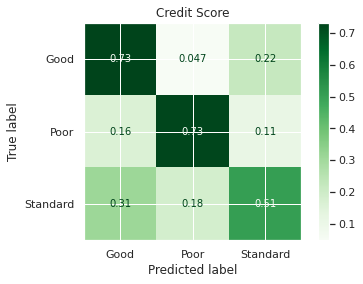

In [167]:
title = 'Credit Score'
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize="true",
)
disp.ax_.set_title(title)
disp.ax_.xaxis.set_ticklabels(['Good', 'Poor', 'Standard'])
disp.ax_.yaxis.set_ticklabels(['Good', 'Poor', 'Standard'])

plt.show()

In [168]:
x_test.shape

(1287, 22)

In [169]:
pd.DataFrame({"actual":y_test, "prediction":clf.predict(x_test)})

,actual,prediction
2763,1,1
6622,1,1
4261,0,0
11488,2,2
6298,2,1
...,...,...
2910,1,1
10126,2,1
10368,2,1
1223,1,1


In [170]:
title= 'Influence on Credit Score'
feature_importance = pd.DataFrame(
    {
        "Factor":clf.feature_names_in_, 
        "Coef":clf.coef_[0],
        "Importance":pow(math.e, clf.coef_[0])
    }
)
disp.ax_.set_title(title)
feature_importance.sort_values(by=['Importance'],ascending=False)

,Factor,Coef,Importance
0,Age,0.012508,1.012586
15,Credit_Utilization_Ratio,0.012040,1.012113
16,Credit_History_Age,0.007380,1.007408
18,Total_EMI_per_month,0.006318,1.006338
21,Monthly_Balance,0.005739,1.005755
19,Amount_invested_monthly,0.005539,1.005554
10,Num_of_Delayed_Payment,0.003989,1.003997
1,Occupation,0.001975,1.001977
8,Type_of_Loan,0.000094,1.000094
2,Annual_Income,0.000005,1.000005


In [171]:
pow(math.e,clf.coef_[0])

array([1.01258645, 1.00197655, 1.00000507, 0.99936807, 0.98992209,
       0.99557379, 0.89903464, 0.99198534, 1.00009373, 0.98425867,
       1.00399694, 0.96482304, 0.97235732, 0.98627879, 0.99970022,
       1.01211266, 1.00740767, 0.98643922, 1.00633847, 1.00555426,
       0.97465359, 1.00575508])

In [172]:
clf.predict(x_test)

array([1, 1, 0, ..., 1, 1, 2])

In [173]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       422
           1       0.76      0.73      0.74       426
           2       0.61      0.51      0.56       439

    accuracy                           0.65      1287
   macro avg       0.66      0.66      0.65      1287
weighted avg       0.66      0.65      0.65      1287

